# Setup


In [37]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load the Data

In [38]:
import pandas as pd
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
def load_data(path=DATA_PATH):
    csv_path = os.path.join(path, "econd_data.csv")
    return pd.read_csv(csv_path)

In [39]:
raw_data = load_data()

## Take a Quick Look at the Data Structure

In [40]:
raw_data.head()

,EN,N2,O2,N,O,NO,ION,ECOND
0,0.0,0.003744,0.000438,0.509281,0.388374,0.097923,0.000240,9.028228
1,0.0,0.007702,0.007778,0.500921,0.385850,0.097244,0.000505,9.049518
2,0.0,0.045885,0.023827,0.496921,0.346406,0.086013,0.000948,9.054821
3,0.0,0.055009,0.019576,0.500709,0.331736,0.092946,0.000024,8.585092
4,0.0,0.001590,0.009277,0.591927,0.362126,0.034547,0.000533,9.050017


In [41]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165000 entries, 0 to 164999
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EN      165000 non-null  float64
 1   N2      165000 non-null  float64
 2   O2      165000 non-null  float64
 3   N       165000 non-null  float64
 4   O       165000 non-null  float64
 5   NO      165000 non-null  float64
 6   ION     165000 non-null  float64
 7   ECOND   165000 non-null  float64
dtypes: float64(8)
memory usage: 10.1 MB


In [42]:
raw_data.describe()

,EN,N2,O2,N,O,NO,ION,ECOND
count,165000.000000,165000.000000,165000.000000,1.650000e+05,1.650000e+05,1.650000e+05,1.650000e+05,165000.000000
mean,0.500000,0.484456,0.123141,2.231664e-01,1.279125e-01,4.098457e-02,3.397098e-04,39.522164
std,0.316229,0.265370,0.060899,2.237550e-01,1.210158e-01,2.804313e-02,3.236067e-04,57.160202
min,0.000000,0.000032,0.000030,4.309145e-07,5.995916e-07,6.979426e-08,4.308682e-09,0.000818
25%,0.200000,0.240109,0.070128,2.365274e-02,2.008328e-02,1.702300e-02,3.343060e-05,9.020605
50%,0.500000,0.515109,0.150596,1.434686e-01,7.909982e-02,3.608894e-02,2.526130e-04,9.319390
75%,0.800000,0.756253,0.169331,3.927697e-01,2.278282e-01,6.351238e-02,6.198069e-04,40.902577
max,1.000000,0.799999,0.219973,7.996490e-01,3.998482e-01,9.999711e-02,9.999920e-04,338.795582


Saving figure attribute_histogram_plots


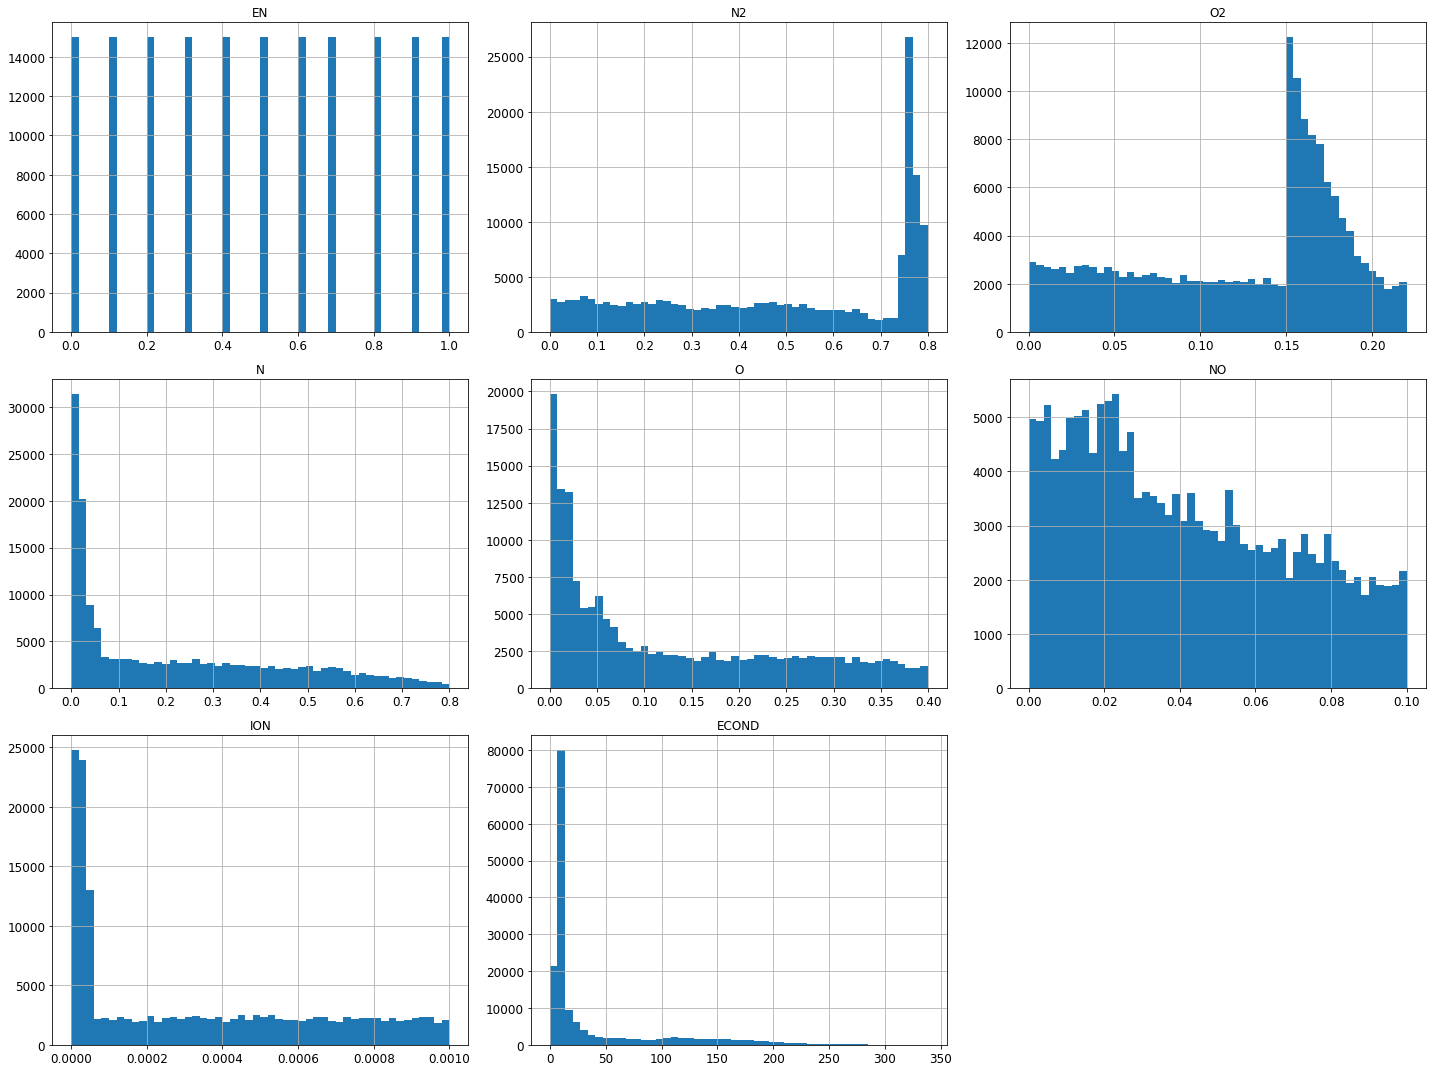

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
raw_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### transform electric conductivity to log($\alpha$/$\sigma$) where $\alpha$ is the electric conductivity and $\sigma$ is the ionization degree
### this reserves the positivetivity

In [44]:
data = raw_data.copy()
data['ECOND'] = np.log(raw_data['ION']/raw_data['ECOND'])

## Create a Test Set

In [45]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Looking for Correlations

In [46]:
data_exploration = train_set.copy()

In [47]:
corr_matrix = data_exploration.corr()

In [48]:
corr_matrix["ECOND"].sort_values(ascending=False)

ECOND    1.000000
ION      0.686180
O        0.367684
N        0.366814
NO       0.224043
O2      -0.294099
EN      -0.371582
N2      -0.434006
Name: ECOND, dtype: float64

Saving figure scatter_matrix_plot


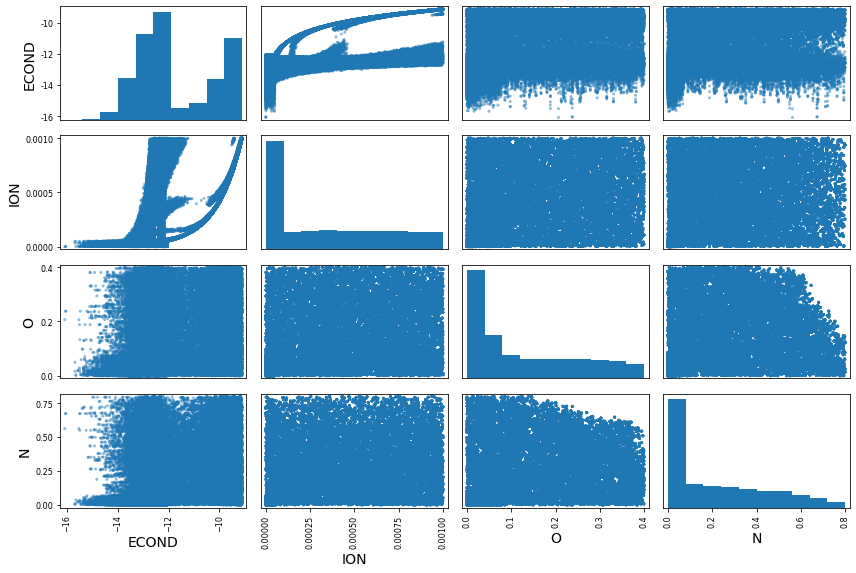

In [49]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["ECOND", "ION", "O", "N"]
scatter_matrix(data_exploration[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [50]:
data_exploration.describe()

,EN,N2,O2,N,O,NO,ION,ECOND
count,132000.000000,132000.000000,132000.000000,1.320000e+05,1.320000e+05,1.320000e+05,1.320000e+05,132000.000000
mean,0.499530,0.484425,0.123095,2.231315e-01,1.279743e-01,4.103407e-02,3.400536e-04,-11.712777
std,0.316393,0.265317,0.060929,2.237446e-01,1.209882e-01,2.806677e-02,3.234318e-04,1.533012
min,0.000000,0.000032,0.000030,4.309145e-07,5.995916e-07,6.979426e-08,4.308682e-09,-16.080964
25%,0.200000,0.240325,0.069953,2.363832e-02,2.015096e-02,1.700349e-02,3.354257e-05,-12.860174
50%,0.500000,0.514448,0.150590,1.432575e-01,7.932525e-02,3.618492e-02,2.534498e-04,-12.279939
75%,0.800000,0.756252,0.169211,3.925769e-01,2.277984e-01,6.364010e-02,6.204303e-04,-10.037978
max,1.000000,0.799999,0.219973,7.996490e-01,3.998482e-01,9.999711e-02,9.999920e-04,-9.109534


# Prepare the Data for Machine Learning Algorithms


In [51]:
train_data = train_set.drop("ECOND", axis=1) # drop labels for training set
train_label = train_set["ECOND"].copy()

## Transformation Pipelines

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

train_data_prepared = preprocessing_pipeline.fit_transform(train_data)

# Select and Train a Model


## Training and Evaluating on the Training Set

In [53]:
from sklearn.neural_network import MLPRegressor
neuralNet = MLPRegressor()
neuralNet.fit(train_data_prepared, train_label)

MLPRegressor()

In [54]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train_data.iloc[:5]
some_labels = train_label.iloc[:5]
some_data_prepared = preprocessing_pipeline.transform(some_data)

print("Predictions:", neuralNet.predict(some_data_prepared))

Predictions: [-13.1924379  -12.46621549  -9.43850731  -9.55625849 -13.15621234]


In [55]:
print("Labels:", list(some_labels))

Labels: [-13.138966069828294, -11.576621025563872, -9.482276439536296, -9.542096509846774, -13.079227440529037]


In [56]:
from sklearn.metrics import mean_squared_error

econd_predictions = neuralNet.predict(train_data_prepared)
nn_mse = mean_squared_error(train_label, econd_predictions)
nn_rmse = np.sqrt(nn_mse)
nn_rmse

0.3020078457299712

In [57]:
from sklearn.metrics import mean_absolute_error

nn_mae = mean_absolute_error(train_label, econd_predictions)
nn_mae

0.15941404732988637

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data_prepared, train_label)

DecisionTreeRegressor(random_state=42)

In [24]:
econd_predictions = tree_reg.predict(train_data_prepared)
tree_mse = mean_squared_error(train_label, econd_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.947377123443392e-16

## Better Evaluation Using Cross-Validation

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data_prepared, train_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

NameError: name 'tree_rmse_scores' is not defined

In [27]:
nn_scores = cross_val_score(neuralNet, train_data_prepared, train_label,
                             scoring="neg_mean_squared_error", cv=10)
nn_rmse_scores = np.sqrt(-nn_scores)
display_scores(nn_rmse_scores)

Scores: [0.30774156 0.29485006 0.29643486 0.29753562 0.29541424 0.29557916
 0.29790422 0.30073167 0.29816568 0.30310057]
Mean: 0.2987457648089924
Standard deviation: 0.003846880249766548


In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data_prepared, train_label)

RandomForestRegressor(random_state=42)

In [29]:
econd_predictions = forest_reg.predict(train_data_prepared)
forest_mse = mean_squared_error(train_label, econd_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.10779800109911036

In [30]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data_prepared, train_label,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.29004773 0.28506236 0.28358598 0.29406727 0.29068302]
Mean: 0.2886892685893791
Standard deviation: 0.0038455528639375278


# Fine-Tuning

## Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [

    {'hidden_layer_sizes': [(64, 16, 8), (32, 16, 8), (16, 8)], 'activation': ['relu', ], 'alpha': [0.0001, 0.001], 'learning_rate': ['constant', 'invscaling', 'adaptive']},

  ]

nn_reg = MLPRegressor(random_state=42)

grid_search = GridSearchCV(nn_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,  verbose=40)
grid_search.fit(train_data_prepared, train_label)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant, score=(train=-0.083, test=-0.084), total=  57.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant, score=(train=-0.086, test=-0.084), total=  38.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant, score=(train=-0.088, test=-0.087), total= 1.7min
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.3min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant, score=(train=-0.084, test=-0.088), total= 1.2min
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.5min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=constant, score=(train=-0.084, test=-0.086), total= 1.0min
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling, score=(train=-0.083, test=-0.084), total=  53.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  6.4min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling, score=(train=-0.086, test=-0.084), total=  33.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  7.0min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling, score=(train=-0.088, test=-0.087), total= 1.8min
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  8.8min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling, score=(train=-0.084, test=-0.088), total= 1.0min
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  9.8min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=invscaling, score=(train=-0.084, test=-0.086), total=  44.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.6min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive, score=(train=-0.083, test=-0.084), total=  56.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 11.5min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive, score=(train=-0.086, test=-0.084), total=  38.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 12.2min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive, score=(train=-0.088, test=-0.087), total= 1.6min
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 13.8min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive, score=(train=-0.084, test=-0.088), total=  59.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 14.8min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(64, 16, 8), learning_rate=adaptive, score=(train=-0.084, test=-0.086), total=  39.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 15.4min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant, score=(train=-0.084, test=-0.086), total=  36.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 16.0min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant, score=(train=-0.086, test=-0.085), total=  41.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 16.7min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant, score=(train=-0.084, test=-0.082), total=  54.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 17.6min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant, score=(train=-0.085, test=-0.088), total=  37.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 18.3min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=constant, score=(train=-0.085, test=-0.087), total=  42.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 19.0min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling, score=(train=-0.084, test=-0.086), total=  35.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 19.6min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling, score=(train=-0.086, test=-0.085), total=  41.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed: 20.3min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling, score=(train=-0.084, test=-0.082), total=  53.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed: 21.2min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling, score=(train=-0.085, test=-0.088), total=  38.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 21.8min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=invscaling, score=(train=-0.085, test=-0.087), total=  41.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 22.5min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive, score=(train=-0.084, test=-0.086), total=  35.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed: 23.1min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive, score=(train=-0.086, test=-0.085), total=  42.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 23.8min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive, score=(train=-0.084, test=-0.082), total=  54.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed: 24.7min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive, score=(train=-0.085, test=-0.088), total=  38.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive 


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed: 25.4min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(32, 16, 8), learning_rate=adaptive, score=(train=-0.085, test=-0.087), total=  42.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 26.1min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.086, test=-0.088), total=  16.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed: 26.4min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.092, test=-0.090), total=  20.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed: 26.7min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.086, test=-0.083), total=  17.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 27.0min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.084, test=-0.087), total=  30.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant 


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 27.5min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.088, test=-0.090), total=  22.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 27.9min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling, score=(train=-0.086, test=-0.088), total=  17.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 28.2min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling, score=(train=-0.092, test=-0.090), total=  20.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed: 28.5min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling, score=(train=-0.086, test=-0.083), total=  17.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 28.8min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling, score=(train=-0.084, test=-0.087), total=  30.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling 


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 29.3min remaining:    0.0s


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=invscaling, score=(train=-0.088, test=-0.090), total=  22.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=adaptive 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=adaptive, score=(train=-0.086, test=-0.088), total=  16.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=adaptive 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=adaptive, score=(train=-0.092, test=-0.090), total=  20.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=adaptive 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=adaptive, score=(train=-0.086, test=-0.083), total=  17.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=adaptive 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(16, 8), learning_rate=adaptive, score

[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.085, test=-0.088), total=  18.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.092, test=-0.090), total=  21.8s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.087, test=-0.085), total=  23.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.086, test=-0.089), total=  19.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(16, 8), learning_rate=constant, score=(train=-0.

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 57.9min finished


GridSearchCV(cv=5, estimator=MLPRegressor(random_state=42),
             param_grid=[{'activation': ['relu'], 'alpha': [0.0001, 0.001],
                          'hidden_layer_sizes': [(64, 16, 8), (32, 16, 8),
                                                 (16, 8)],
                          'learning_rate': ['constant', 'invscaling',
                                            'adaptive']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=40)

In [36]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (32, 16, 8),
 'learning_rate': 'constant'}

In [37]:
grid_search.best_estimator_

MLPRegressor(hidden_layer_sizes=(32, 16, 8), random_state=42)

In [38]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2929153859929396 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 16, 8), 'learning_rate': 'constant'}
0.2929153859929396 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 16, 8), 'learning_rate': 'invscaling'}
0.2929153859929396 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 16, 8), 'learning_rate': 'adaptive'}
0.292749326263384 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 16, 8), 'learning_rate': 'constant'}
0.292749326263384 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 16, 8), 'learning_rate': 'invscaling'}
0.292749326263384 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (32, 16, 8), 'learning_rate': 'adaptive'}
0.2956726817883683 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 8), 'learning_rate': 'constant'}
0.2956726817883683 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 8), 'learning_rate': 'invscaling'}
0.2956726817883683 {'

In [39]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,65.882688,20.733031,0.080001,0.005898,relu,0.0001,"(64, 16, 8)",constant,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.084268,...,-0.085799,0.001390,4,-0.082530,-0.085665,-0.087939,-0.084446,-0.083650,-0.084846,0.001854
1,60.343365,25.849914,0.071399,0.007419,relu,0.0001,"(64, 16, 8)",invscaling,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.084268,...,-0.085799,0.001390,4,-0.082530,-0.085665,-0.087939,-0.084446,-0.083650,-0.084846,0.001854
2,57.787795,20.971851,0.072200,0.013877,relu,0.0001,"(64, 16, 8)",adaptive,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.084268,...,-0.085799,0.001390,4,-0.082530,-0.085665,-0.087939,-0.084446,-0.083650,-0.084846,0.001854
3,42.559196,6.500896,0.041200,0.004354,relu,0.0001,"(32, 16, 8)",constant,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.085816,...,-0.085702,0.002215,1,-0.083957,-0.086119,-0.084172,-0.084867,-0.084504,-0.084724,0.000763
4,42.264340,6.240603,0.039001,0.005762,relu,0.0001,"(32, 16, 8)",invscaling,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.085816,...,-0.085702,0.002215,1,-0.083957,-0.086119,-0.084172,-0.084867,-0.084504,-0.084724,0.000763
5,42.678147,6.390150,0.039399,0.005276,relu,0.0001,"(32, 16, 8)",adaptive,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.085816,...,-0.085702,0.002215,1,-0.083957,-0.086119,-0.084172,-0.084867,-0.084504,-0.084724,0.000763
6,21.396560,4.853084,0.014587,0.002728,relu,0.0001,"(16, 8)",constant,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.087710,...,-0.087422,0.002548,13,-0.085681,-0.092438,-0.085800,-0.083527,-0.087631,-0.087015,0.003007
7,21.565952,4.756479,0.016593,0.005648,relu,0.0001,"(16, 8)",invscaling,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.087710,...,-0.087422,0.002548,13,-0.085681,-0.092438,-0.085800,-0.083527,-0.087631,-0.087015,0.003007
8,21.240439,4.894282,0.014586,0.002235,relu,0.0001,"(16, 8)",adaptive,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",-0.087710,...,-0.087422,0.002548,13,-0.085681,-0.092438,-0.085800,-0.083527,-0.087631,-0.087015,0.003007
9,41.874657,8.779088,0.070999,0.002000,relu,0.001,"(64, 16, 8)",constant,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",-0.088140,...,-0.087413,0.002767,10,-0.085491,-0.090219,-0.085148,-0.087355,-0.084193,-0.086481,0.002132


## Evaluate on the Test Set

In [59]:
final_model = grid_search.best_estimator_

test_data = test_set.drop("ECOND", axis=1) # drop labels for training set
test_label = test_set["ECOND"].copy()
test_data_prepared = preprocessing_pipeline.transform(test_data)
test_predictions = final_model.predict(test_data_prepared)
final_mse = mean_squared_error(test_label, test_predictions)
final_rmse = np.sqrt(final_mse)

NameError: name 'final_model' is not defined

In [43]:
final_rmse

0.2932111471074701

## A full pipeline with both preparation and prediction

In [60]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", preprocessing_pipeline),
        ("neuralnet", MLPRegressor(hidden_layer_sizes=(32, 16, 8))),
    ])

full_pipeline_with_predictor.fit(train_data, train_label)
full_pipeline_with_predictor.predict(some_data)

array([-12.99991035, -12.70989387,  -9.41314198,  -9.50880335,
       -13.33786247])

## Model persistence using joblib

In [61]:
my_model = full_pipeline_with_predictor

In [62]:
import joblib
joblib.dump(my_model, "econd_surrogate.pkl") # DIFF
#...
my_model_loaded = joblib.load("econd_surrogate.pkl") # DIFF

In [63]:
my_model_loaded.predict(some_data.iloc[:1])

array([-12.99991035])